In [1]:
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener             
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
import credentials
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class TweetClient():
    def __init__(self, tweet_user = None):
        self.auth = TweetAuth().authenticate()
        self.tweet_client = API(self.auth)
        
        self.tweet_user = tweet_user

    def get_tweetclient(self):
        return self.tweet_client

    def get_tweets(self, no_tweets):
        tweets = []
        for i in Cursor(self.tweet_client.user_timeline, id = self.tweet_user).items(no_tweets):
            tweets.append(i)
        return tweets

    def get_friend_list(self, no_friends):
        friend_list = []
        for j in Cursor(self.tweet_client.friends, id = self.tweet_user).items(no_friends):
            friend_list,append(j)
        return friend_list

    def get_hometimeline_tweets(self, no_tweets):
        hometimeline_tweets = []
        for k in Cursor(self.tweets_client.home_timeline, id = self.tweet_user).items(no_tweets):
            hometimeline_tweets.append(k)
        return hometimeline_list

In [3]:
class TweetAuth():
    def authenticate(self):
          auth = OAuthHandler(credentials.CONSUMER_KEY, credentials.CONSUMER_SECRET)
          auth.set_access_token(credentials.ACCESS_TOKEN, credentials.ACCESS_TOKEN_SECRET)
          return auth

In [4]:
class TweetStream():
    def __init__(self):
        self.tweet_authenticator = TweetAuth()

    def stream_tweets(self, fetched_tweet, hashtag_list):
        catcher = CatchTweet(fetched_tweet)
        auth = self.tweet_authenticator.authenticate()
        stream = Stream(auth, catcher)

        stream.filter(track=hashtag_list)

In [5]:
class CatchTweet(StreamListener):
    def __init__(self, fetched_tweet):
        self.fetched_tweet = fetched_tweet

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweet, 'a') as tf:
                tf.write(data)
            return True

        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

    def on_error(self, status):
        if status == 420:
            return False
        print(status)

In [6]:
class TweetAnalyzer():
    def tweetclean(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())    
    def sentiment_analysis(self, tweet):
        analysis = TextBlob(self.tweetclean(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
    
    def tweet2df(self, tweets):
        data = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])
        data['ID'] = np.array([tweet.id for tweet in tweets])
        data['Length'] = np.array([len(tweet.text) for tweet in tweets])
        data['Date'] = np.array([tweet.created_at for tweet in tweets])
        data['Source'] = np.array([tweet.source for tweet in tweets])
        data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
        data['Retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        
        return data

In [21]:
if __name__ == "__main__":

    tweet_client = TweetClient()
    tweet_analyzer = TweetAnalyzer()
    api = tweet_client.get_tweetclient()
    
    x = input("Enter the Twitter Handle of User on which you want to perform Sentiment Analysis:-  ")
    tweets = api.user_timeline(screen_name = x, count = 200)
    #print(dir(tweets[0]))
    #print(tweets[0].id)
    #print(tweets[0].retweet_count)
    data = tweet_analyzer.tweet2df(tweets)
    data['Sentiment'] = np.array([tweet_analyzer.sentiment_analysis(tweet) for tweet in data['Tweets']])
    print(data.head(50))

Enter the Twitter Handle of User on which you want to perform Sentiment Analysis:-  GoogleIO201X
                                               Tweets                   ID  \
0   335 days left until Google I/O 2020. There’s r...  1137128098812481537   
1   342 days left until Google I/O 2020. I heard t...  1134505536639119360   
2   349 days left until Google I/O 2020. \n\nStill...  1132119093249810432   
3   358 days left until Google I/O 2020. \n\nIt wo...  1129421317252485121   
4                365 days left until Google I/O 2020.  1126728574826713088   
5   RT @sundarpichai: #io19 is a wrap and a big th...  1126712387581513730   
6   RT @GooglePlayDev: 🎉 That's a wrap for #io19! ...  1126649285355790336   
7   RT @Google: That's a wrap! Close out #io19 wit...  1126643875945205761   
8   RT @Google: Count ‘em up! 100 things we announ...  1126643866239561728   
9   As you can tell by the tweets, Google I/O 2019...  1126643016968445952   
10  RT @gdg: 👏🏾Thank you to all our community

# Visualizing The Data & Sentiments

In [22]:
print(np.mean(data['Length']))

115.04


In [23]:
print(np.max(data['Likes']))

496


In [24]:
print(np.max(data['Retweets']))

25345


Text(0, 0.5, 'No. Of Likes')

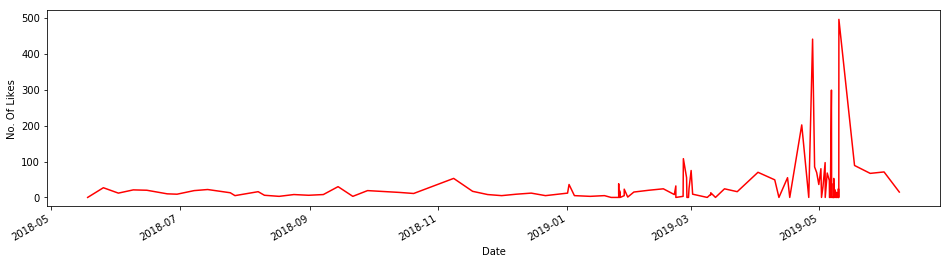

In [25]:
like_Series = pd.Series(data = data['Likes'].values, index = data['Date'])
like_Series.plot(figsize = (16,4), color = 'r')
plt.xlabel('Date')
plt.ylabel('No. Of Likes')

Text(0, 0.5, 'No. Of Retweets')

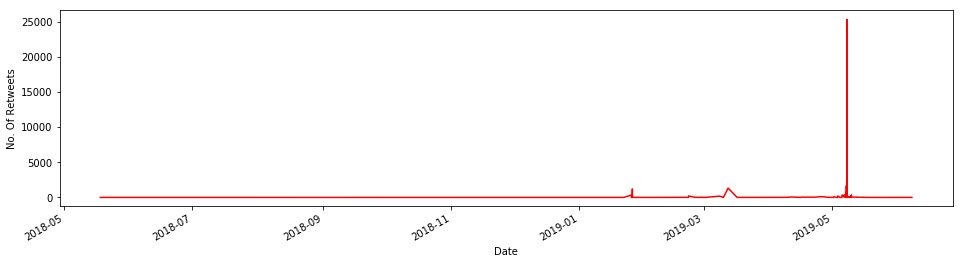

In [26]:
retweet_Series = pd.Series(data = data['Retweets'].values, index = data['Date'])
retweet_Series.plot(figsize = (16,4), color = 'r')
plt.xlabel('Date')
plt.ylabel('No. Of Retweets')

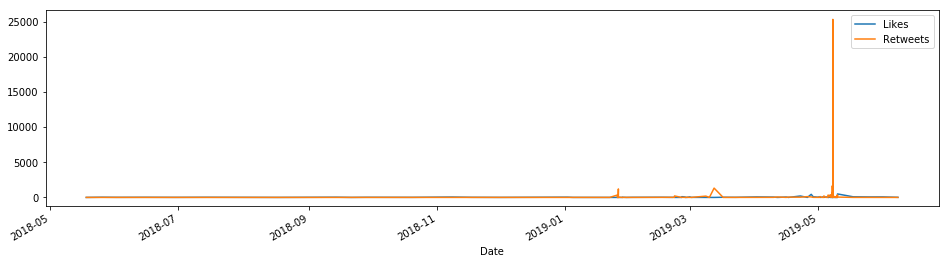

In [27]:
like_Series = pd.Series(data = data['Likes'].values, index = data['Date'])
like_Series.plot(figsize = (16,4), label = 'Likes', legend = True)
retweet_Series = pd.Series(data = data['Retweets'].values, index = data['Date'])
retweet_Series.plot(figsize = (16,4), label = 'Retweets', legend = True)
plt.show()

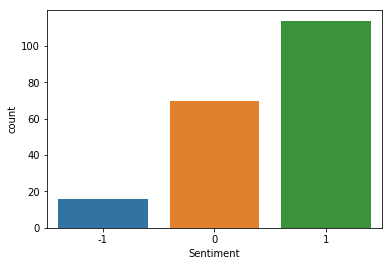

In [28]:
sns.countplot(data['Sentiment'])

Text(0, 0.5, 'Sentiments')

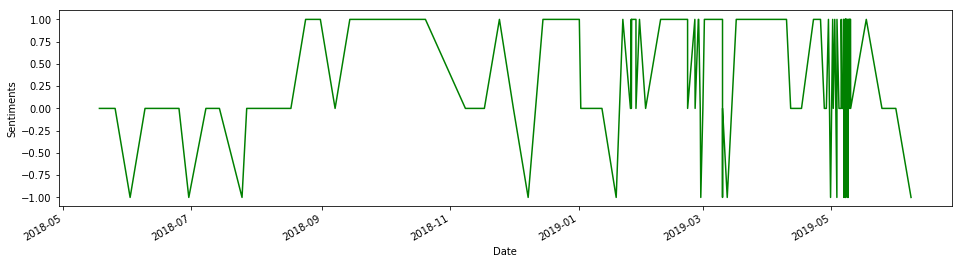

In [29]:
sentiment_Series = pd.Series(data = data['Sentiment'].values, index = data['Date'])
sentiment_Series.plot(figsize = (16, 4), color = 'g')
plt.xlabel('Date')
plt.ylabel('Sentiments')